In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Global Maritime Events.csv')
df.head()

idxEventList       Date Updated_Date  \
0            67  21/7/2023    21-Jul-23   
1            70  24/7/2023    24-Jul-23   
2            72  24/7/2023    24-Jul-23   
3            78  19/7/2023    19-Jul-23   
4            85   9/7/2023     9-Jul-23   

                                            Headline  \
0  Rail service resumes to and from the Port of H...   
1  Port of Mundra experiencing cargo backlog due ...   
2  Port workers at Le Havre extend strike action ...   
3  Truck congestion reported at Port of Durban fo...   
4  Truckers from Intergremial de Transporte Profe...   

                                         Description  Severity PortCode  \
0  Updated local media sources report on July 28 ...    Severe    CAHAL   
1  Maritime media sources report on July 24 that ...    Severe    INMUN   
2  Updated intelligence received by Everstream An...    Severe    FRLEH   
3  On July 20, maritime sources revealed that the...  Moderate    ZADUR   
4  Media sources on July 9 indicate that the Inte...     Minor    UYMVD   

    PortState       Country   Latitude  Longitude  \
0     HALIFAX        Canada  44.628117 -63.562271   
1      MUNDRA         India  22.742560  69.712330   
2    LE HAVRE        France  49.473257   0.152048   
3      DURBAN  South Africa -29.882656  31.020382   
4  MONTEVIDEO       Uruguay -34.904917 -56.208573   

   Avg Affected Stay Duration by Event  
0                             0.488889  
1                             8.871528  
2                             3.693287  
3                            20.145833  
4                            41.102778

In [3]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

missing_values

idxEventList                           0
Date                                   0
Updated_Date                           0
Headline                               0
Description                            0
Severity                               0
PortCode                               0
PortState                              0
Country                                0
Latitude                               0
Longitude                              0
Avg Affected Stay Duration by Event    0
dtype: int64

In [4]:
# Summary statistics for numerical columns
df.describe()

idxEventList    Latitude   Longitude  \
count    847.000000  847.000000  847.000000   
mean    3252.512397   25.259907   47.130313   
std     2137.789918   26.453040   63.092323   
min       67.000000  -41.054966 -130.358160   
25%     1556.000000   10.310097    3.382910   
50%     2952.000000   31.321360   31.017650   
75%     4389.000000   49.473257  114.124008   
max     7881.000000   57.694843  153.175952   

       Avg Affected Stay Duration by Event  
count                           847.000000  
mean                              6.573494  
std                               7.175132  
min                               0.231944  
25%                               1.986905  
50%                               4.177078  
75%                               7.879508  
max                              44.974306

In [5]:
#Count number of Countries involved
df['Country'].nunique()

62

In [6]:
#Count number of Portstate
df['PortState'].nunique()

145

In [7]:
# Value counts for categorical columns (For Severity, Countries & PortState)
severity_counts = df['Severity'].value_counts()
country_counts = df['Country'].value_counts()
port_state_counts = df['PortState'].value_counts()

print(severity_counts)
print()
print(country_counts)
print()
print(port_state_counts)

Severity
Moderate    486
Minor       277
Severe       84
Name: count, dtype: int64

Country
China             165
Germany            75
France             57
South Africa       56
United Kingdom     52
                 ... 
Thailand            1
Cameroon            1
Ghana               1
Uruguay             1
Yemen               1
Name: count, Length: 62, dtype: int64

PortState
SHANGHAI        80
DURBAN          47
HAMBURG         46
LE HAVRE        43
DALIAN          30
                ..
LIANYUNGANG      1
TARANTO          1
RICHARDS BAY     1
GANGAVARAM       1
TAICHUNG         1
Name: count, Length: 145, dtype: int64


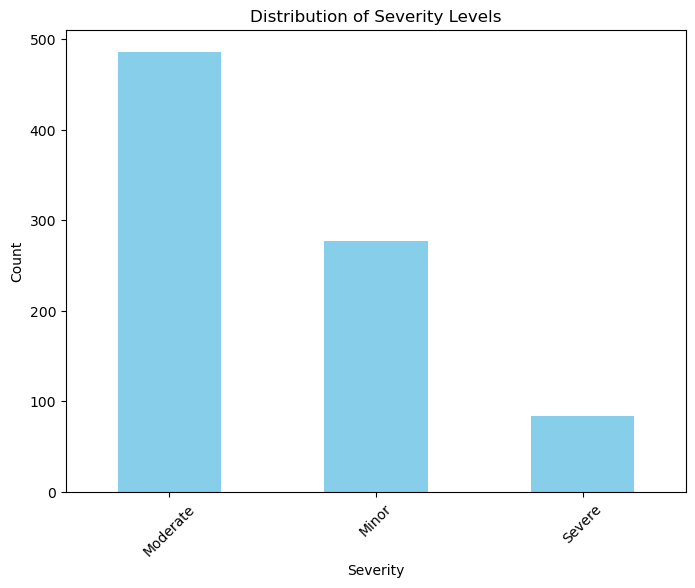

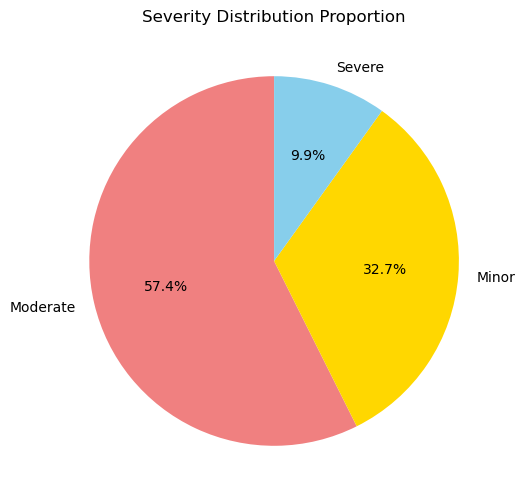

In [8]:
# Bar plot for severity distribution
plt.figure(figsize=(8, 6))
severity_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Severity Levels')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Pie chart for severity distribution
plt.figure(figsize=(8, 6))
severity_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'gold', 'skyblue'])
plt.title('Severity Distribution Proportion')
plt.ylabel('')  # Hide the y-label
plt.show()

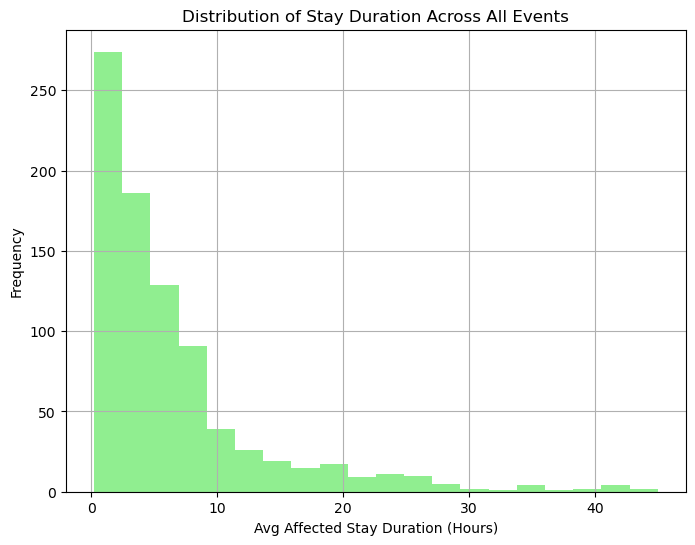

In [9]:
# Histogram of stay durations
plt.figure(figsize=(8, 6))
df['Avg Affected Stay Duration by Event'].hist(bins=20, color='lightgreen')
plt.title('Distribution of Stay Duration Across All Events')
plt.xlabel('Avg Affected Stay Duration (Hours)')
plt.ylabel('Frequency')
plt.show()

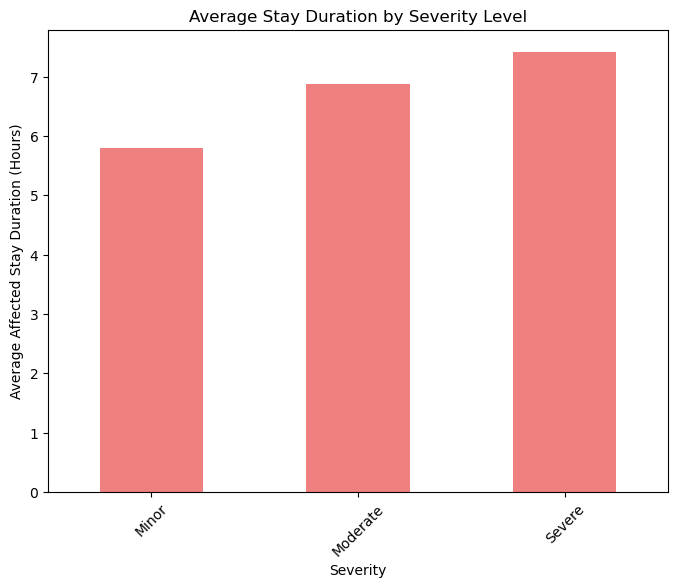

<Figure size 1000x600 with 0 Axes>

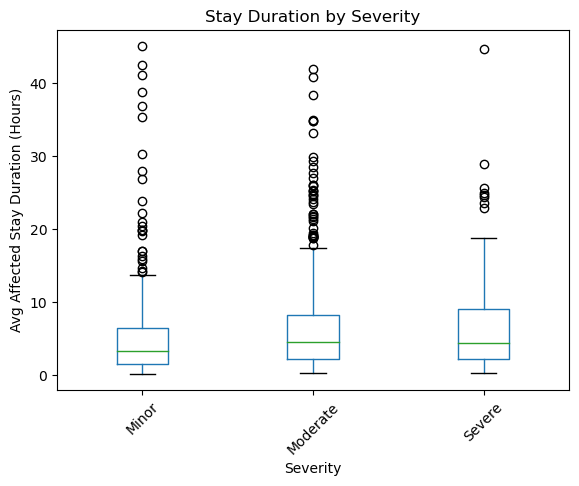

In [10]:
# Grouping by severity and calculating mean stay duration
severity_vs_duration = df.groupby('Severity')['Avg Affected Stay Duration by Event'].mean()

# Bar plot for average stay duration by severity
plt.figure(figsize=(8, 6))
severity_vs_duration.plot(kind='bar', color='lightcoral')
plt.title('Average Stay Duration by Severity Level')
plt.xlabel('Severity')
plt.ylabel('Average Affected Stay Duration (Hours)')
plt.xticks(rotation=45)
plt.show()

# Box plot to show the distribution of stay duration by severity
plt.figure(figsize=(10, 6))
df.boxplot(column='Avg Affected Stay Duration by Event', by='Severity', grid=False)
plt.title('Stay Duration by Severity')
plt.suptitle('')  # Remove automatic title from boxplot
plt.xlabel('Severity')
plt.ylabel('Avg Affected Stay Duration (Hours)')
plt.xticks(rotation=45)
plt.show()


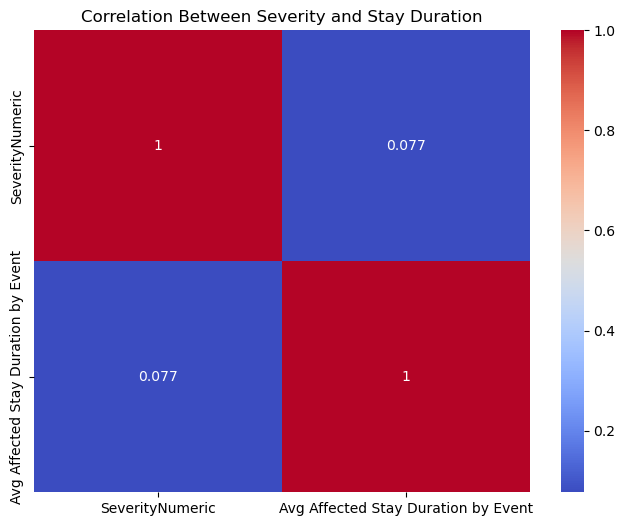

In [11]:
# Convert severity levels to numeric values
severity_mapping = {'Severe': 3, 'Moderate': 2, 'Minor': 1}
df['SeverityNumeric'] = df['Severity'].map(severity_mapping)

# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df[['SeverityNumeric', 'Avg Affected Stay Duration by Event']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Severity and Stay Duration')
plt.show()

In [12]:
# !pip3 install folium

In [13]:
#Severity of all of the Port Location 
#Port Location Mapping (by severity): Helps to identify geographic patterns of disruption. 

import folium

# Create a base map centered around an average latitude and longitude
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=2)

# Define color based on severity
def severity_color(severity):
    if severity == 'Severe':
        return 'red'
    elif severity == 'Moderate':
        return 'orange'
    else:
        return 'green'

# Add markers for each port
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        popup=f"{row['Headline']}<br>Stay Duration: {row['Avg Affected Stay Duration by Event']} hours",
        color=severity_color(row['Severity']),
        fill=True,
        fill_opacity=0.7
    ).add_to(m)

# Save the map to an HTML file
m.save('port_disruptions_map.html')
m

In [14]:
#Heatmap of Port Disruptions
#Helps to identify hotspots where disruption events are concentrated.
#Heatmap to show the density of disruptions. Areas with higher disruption counts will have more intense colors. 


from folium.plugins import HeatMap

# Prepare data for heatmap (latitude, longitude, and severity converted to a numeric scale)
heat_data = [[row['Latitude'], row['Longitude'], row['Avg Affected Stay Duration by Event']] for index, row in df.iterrows()]

# Create base map
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=2)

# Add heatmap
HeatMap(heat_data, radius=10).add_to(m)

# Save and display the map
m.save('heatmap_port_disruptions.html')
m

In [15]:
# Bubble Map: Highlights ports where disruptions lead to especially long delays.
# A bubble map to size the markers based on a numeric feature like Avg Affected Stay Duration. 
# Larger bubbles represents longer delays.


# Bubble size proportional to stay duration
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['Avg Affected Stay Duration by Event'] / 2,  # Adjust the size based on stay duration
        popup=f"{row['Headline']}<br>Stay Duration: {row['Avg Affected Stay Duration by Event']} hours",
        color=severity_color(row['Severity']),
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

# Save and display the bubble map
m.save('bubble_map_stay_duration.html')
m

<Figure size 1000x600 with 0 Axes>

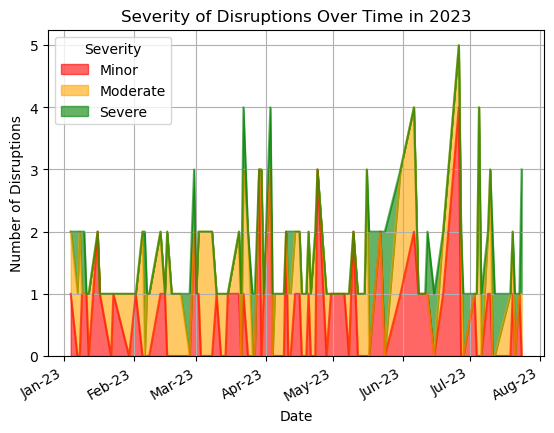

<Figure size 1000x600 with 0 Axes>

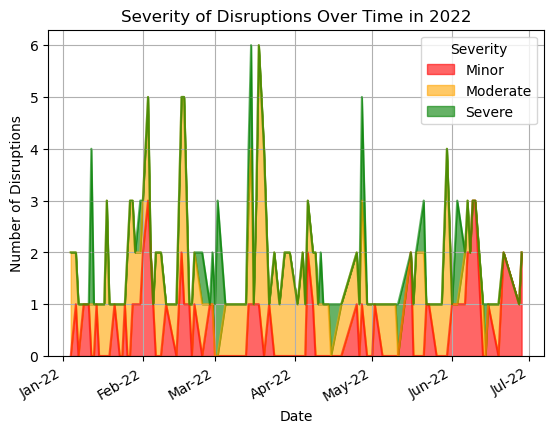

<Figure size 1000x600 with 0 Axes>

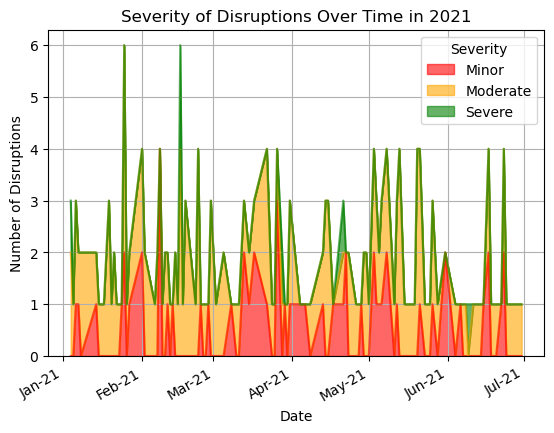

<Figure size 1000x600 with 0 Axes>

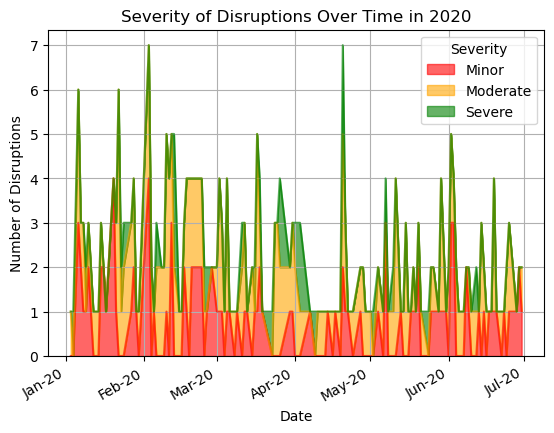

In [16]:
import matplotlib.dates as mdates

# Convert "Updated_Date" to datetime if it's not already
df['Updated_Date'] = pd.to_datetime(df['Updated_Date'], format='%d-%b-%y')

# Group by date and calculate the average stay duration per day
stay_duration_over_time = df.groupby('Updated_Date')['Avg Affected Stay Duration by Event'].mean()

# Extract years available in the data
years = df['Updated_Date'].dt.year.unique()

# Convert the 'Updated_Date' to datetime format if not already done
df['Updated_Date'] = pd.to_datetime(df['Updated_Date'], format='%d-%b-%y')

# Extract year from the 'Updated_Date' column
df['Year'] = df['Updated_Date'].dt.year

# Group by severity and date
severity_over_time = df.groupby([df['Updated_Date'], 'Severity']).size().unstack().fillna(0)

# Define date format for the x-axis
date_format = mdates.DateFormatter('%b-%y')  # This will display dates in "Jan-23" format

# Loop through each year and plot a separate graph
for year in df['Year'].unique():
    # Filter the data for the current year
    year_data = severity_over_time[severity_over_time.index.year == year]
    
    # Create a figure for each year
    plt.figure(figsize=(10, 6))
    
    # Plot stacked area chart for severity over time for the current year
    year_data.plot(kind='area', stacked=True, color=['red', 'orange', 'green'], alpha=0.6)
    
    # Set title and labels
    plt.title(f'Severity of Disruptions Over Time in {year}')
    plt.xlabel('Date')
    plt.ylabel('Number of Disruptions')
    
    # Format the x-axis with the 'Jan-23' date format
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Adjust ticks to show monthly intervals
    
    # Display grid
    plt.grid(True)
    
    # Show the plot
    plt.show()

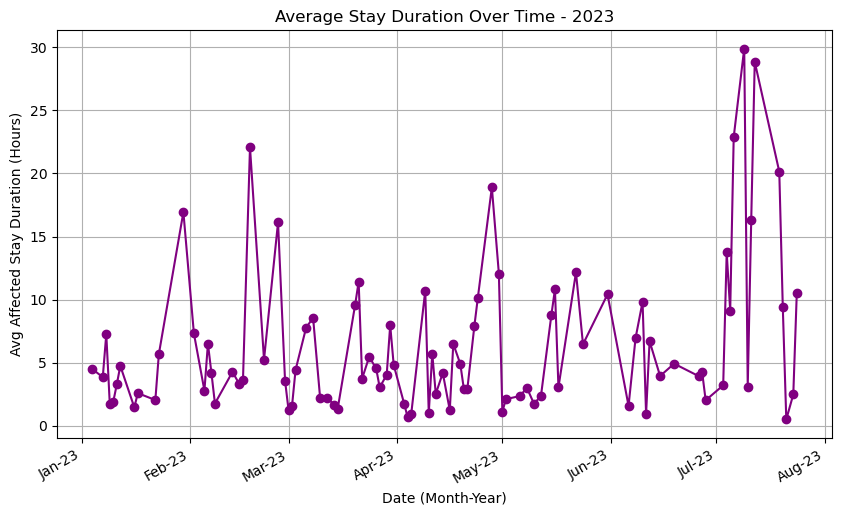

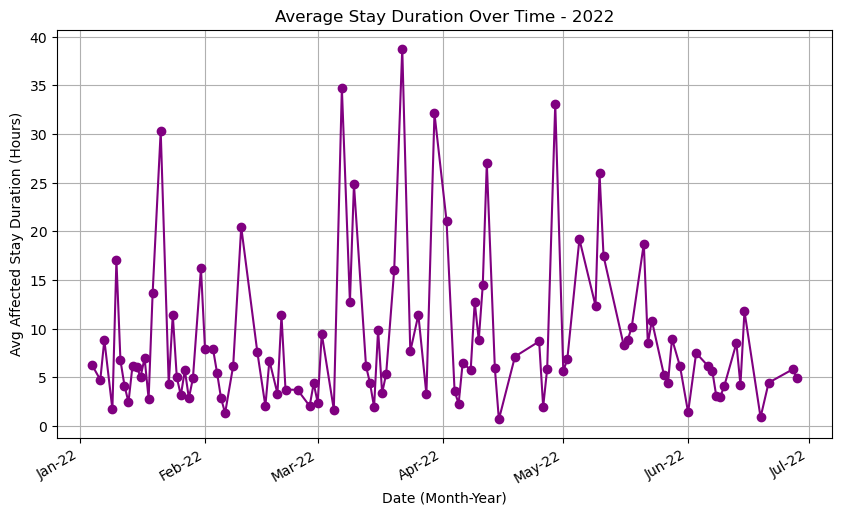

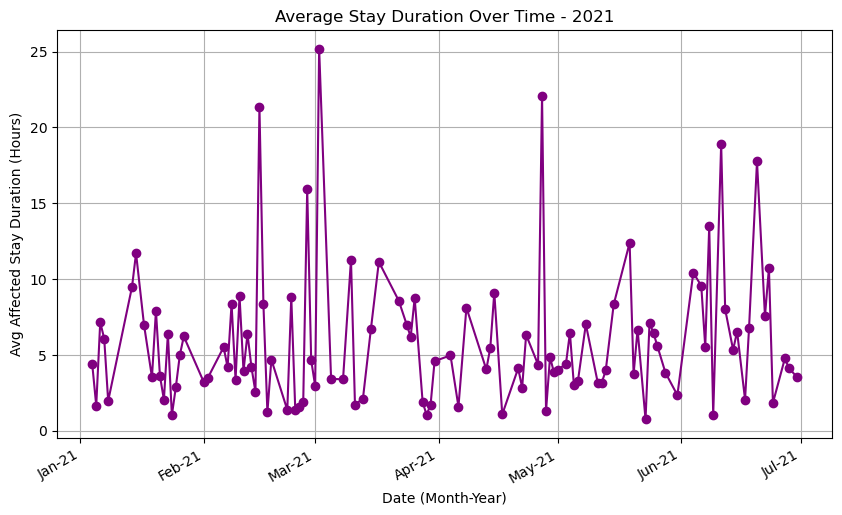

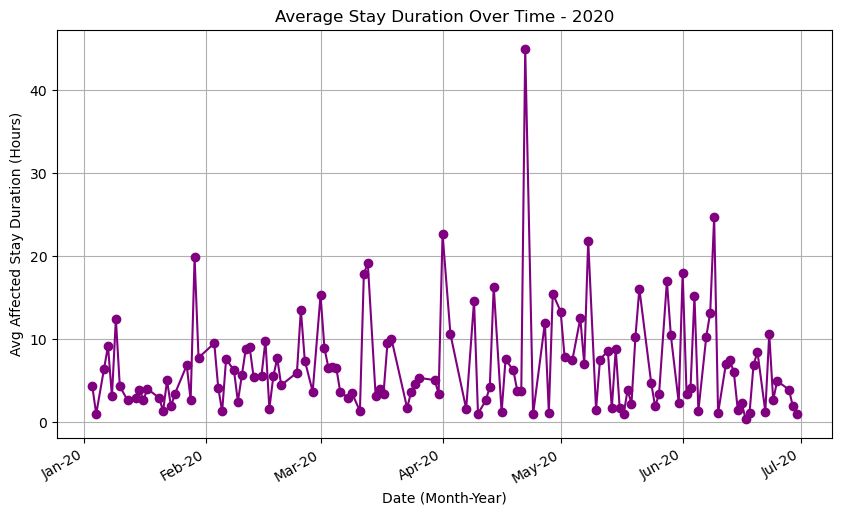

In [17]:
import matplotlib.dates as mdates

# Convert "Updated_Date" to datetime if it's not already
df['Updated_Date'] = pd.to_datetime(df['Updated_Date'], format='%d-%b-%y')

# Group by date and calculate the average stay duration per day
stay_duration_over_time = df.groupby('Updated_Date')['Avg Affected Stay Duration by Event'].mean()

# Extract years available in the data
years = df['Updated_Date'].dt.year.unique()

# Plot separate graphs for each year
for year in years:
    # Filter data for the specific year
    yearly_data = stay_duration_over_time.loc[stay_duration_over_time.index.year == year]
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(yearly_data.index, yearly_data, marker='o', color='purple')
    
    # Set the date format on the x-axis to "Jan-23" format
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
    
    # Rotate x-axis labels for better readability
    plt.gcf().autofmt_xdate()
    
    # Add titles and labels
    plt.title(f'Average Stay Duration Over Time - {year}')
    plt.xlabel('Date (Month-Year)')
    plt.ylabel('Avg Affected Stay Duration (Hours)')
    
    # Display the grid
    plt.grid(True)
    
    # Show the plot for the specific year
    plt.show()

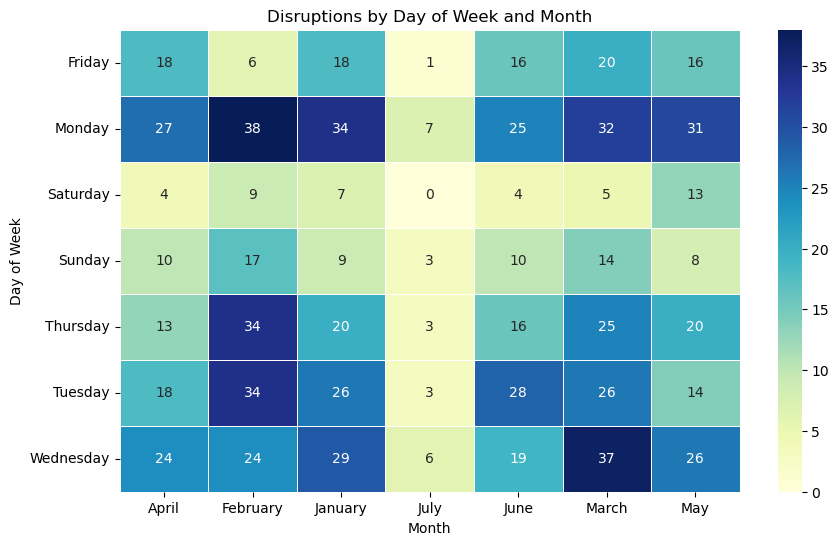

In [18]:
# Extract day of week and month from the date
df['Day of Week'] = df['Updated_Date'].dt.day_name()
df['Month'] = df['Updated_Date'].dt.month_name()

# Create a pivot table for disruptions by day of the week and month
heatmap_data = df.pivot_table(index='Day of Week', columns='Month', values='idxEventList', aggfunc='count', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', linewidths=.5)
plt.title('Disruptions by Day of Week and Month')
plt.xlabel('Month')
plt.ylabel('Day of Week')
plt.show()


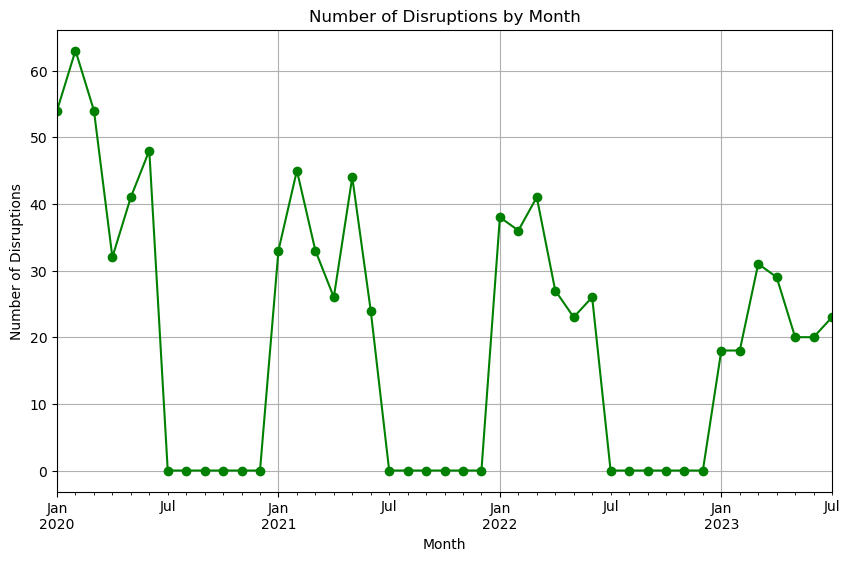

In [19]:
# Ensure 'Updated_Date' is in datetime format and set as the index
df['Updated_Date'] = pd.to_datetime(df['Updated_Date'], errors='coerce')
df.set_index('Updated_Date', inplace=True)

# Group by month
disruptions_by_month = df['idxEventList'].resample('M').count()

# Plot disruptions by month
plt.figure(figsize=(10, 6))
disruptions_by_month.plot(kind='line', color='green', marker='o')
plt.title('Number of Disruptions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Disruptions')
plt.grid(True)
plt.show()

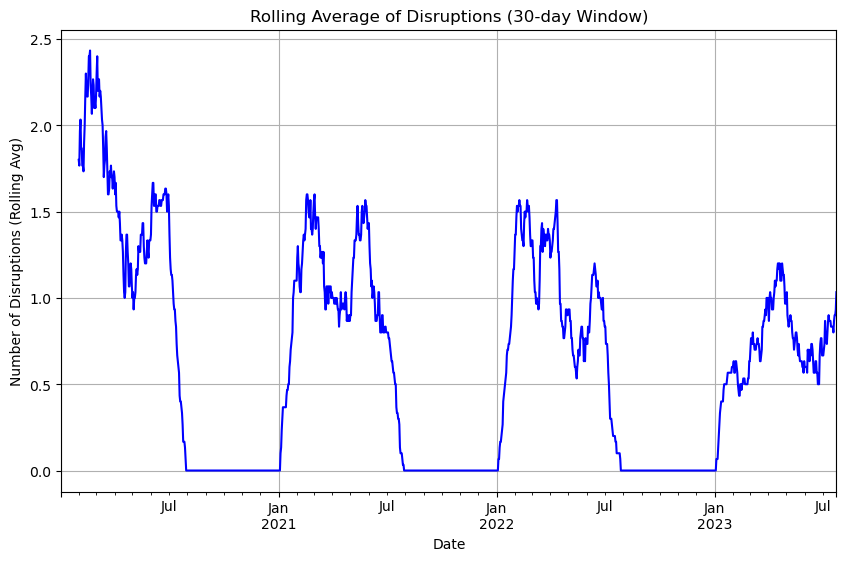

In [20]:
# Define disruptions_over_time for the rolling average calculation
disruptions_over_time = df['idxEventList'].resample('D').count()

# Calculate the rolling average (30-day window)
rolling_avg_disruptions = disruptions_over_time.rolling(window=30).mean()

# Plot the rolling average of disruptions
plt.figure(figsize=(10, 6))
rolling_avg_disruptions.plot(kind='line', color='blue')
plt.title('Rolling Average of Disruptions (30-day Window)')
plt.xlabel('Date')
plt.ylabel('Number of Disruptions (Rolling Avg)')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

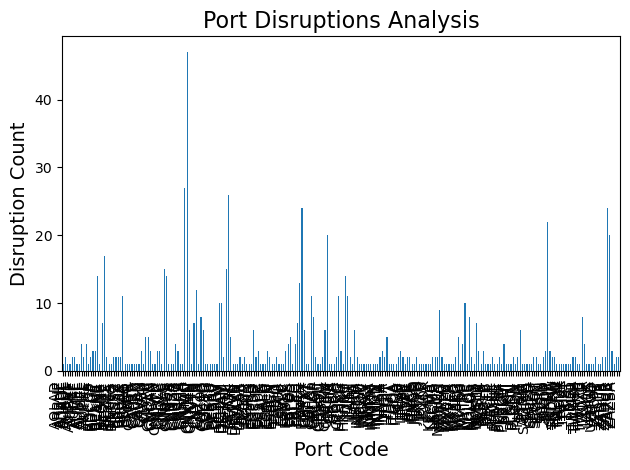

In [21]:
port_disruptions = df.groupby(['PortCode', 'PortState', 'Severity']).size().reset_index(name='DisruptionCount')

#Disruption count by ports
plt.figure(figsize=(12, 6))
port_disruptions.plot(kind='bar', x='PortCode', y='DisruptionCount', legend=False)


plt.xticks(rotation=90, ha='right')
plt.title('Port Disruptions Analysis', fontsize=16)
plt.xlabel('Port Code', fontsize=14)
plt.ylabel('Disruption Count', fontsize=14)
plt.tight_layout()
plt.show()

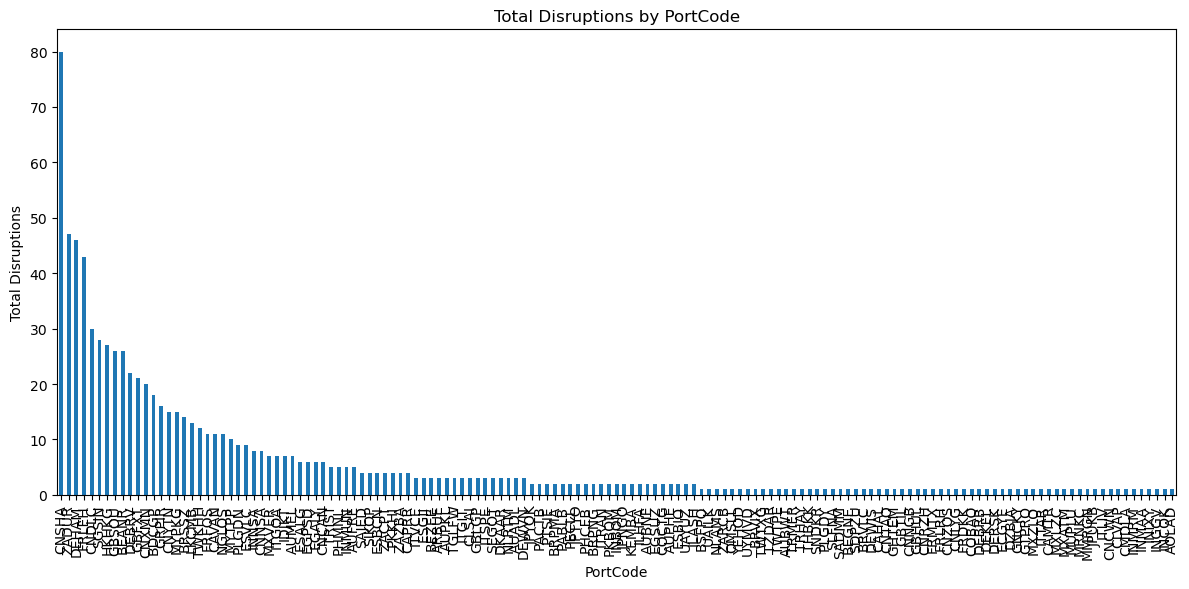

In [22]:
#total disruptions by port
plt.figure(figsize=(12, 6))
port_disruptions.groupby('PortCode')['DisruptionCount'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Disruptions by PortCode')
plt.xlabel('PortCode')
plt.ylabel('Total Disruptions')
plt.tight_layout()
plt.show()

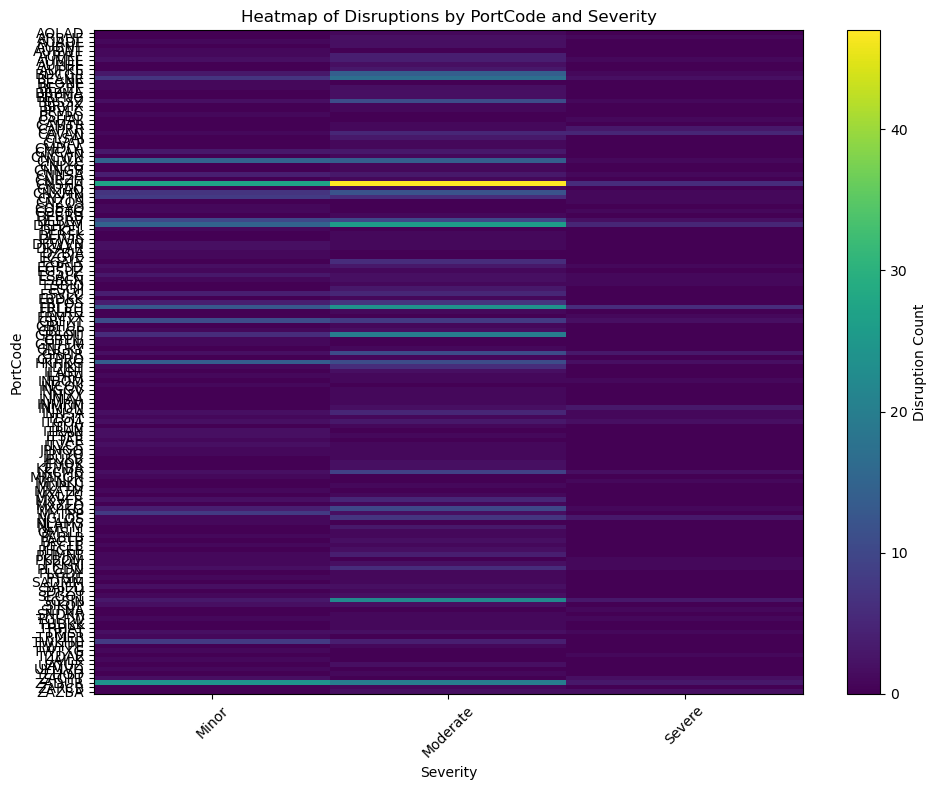

In [23]:
#Heatmap of disruptions by PortCode and Severity
severity_pivot = port_disruptions.pivot_table(index='PortCode', columns='Severity', values='DisruptionCount', fill_value=0)
plt.figure(figsize=(10, 8))
plt.imshow(severity_pivot, cmap='viridis', aspect='auto')
plt.colorbar(label='Disruption Count')
plt.title('Heatmap of Disruptions by PortCode and Severity')
plt.xlabel('Severity')
plt.ylabel('PortCode')
plt.xticks(ticks=range(len(severity_pivot.columns)), labels=severity_pivot.columns, rotation=45)
plt.yticks(ticks=range(len(severity_pivot.index)), labels=severity_pivot.index)
plt.tight_layout()
plt.show()

In [24]:
from scipy import stats

# Calculating mean, median, and mode for the 'DisruptionCount'
mean_value = port_disruptions['DisruptionCount'].mean()
median_value = port_disruptions['DisruptionCount'].median()
mode_value = stats.mode(port_disruptions['DisruptionCount'], keepdims=True)[0][0]

# Display the results
print("Mean: {:.2f}".format(mean_value))
print("Median: {}".format(median_value))
print("Mode: {}".format(mode_value))

Mean: 3.49
Median: 1.0
Mode: 1


In [25]:
# Converting Severity to a numerical format for correlation analysis
severity_mapping = {'Minor': 1, 'Moderate': 2, 'Severe': 3}
df['Severity_Numeric'] = df['Severity'].map(severity_mapping)

# Correlation analysis between "Severity" and "Avg Affected Stay Duration"
correlation = df[['Severity_Numeric', 'Avg Affected Stay Duration by Event']].corr().iloc[0, 1]

correlation

0.07695217940872616

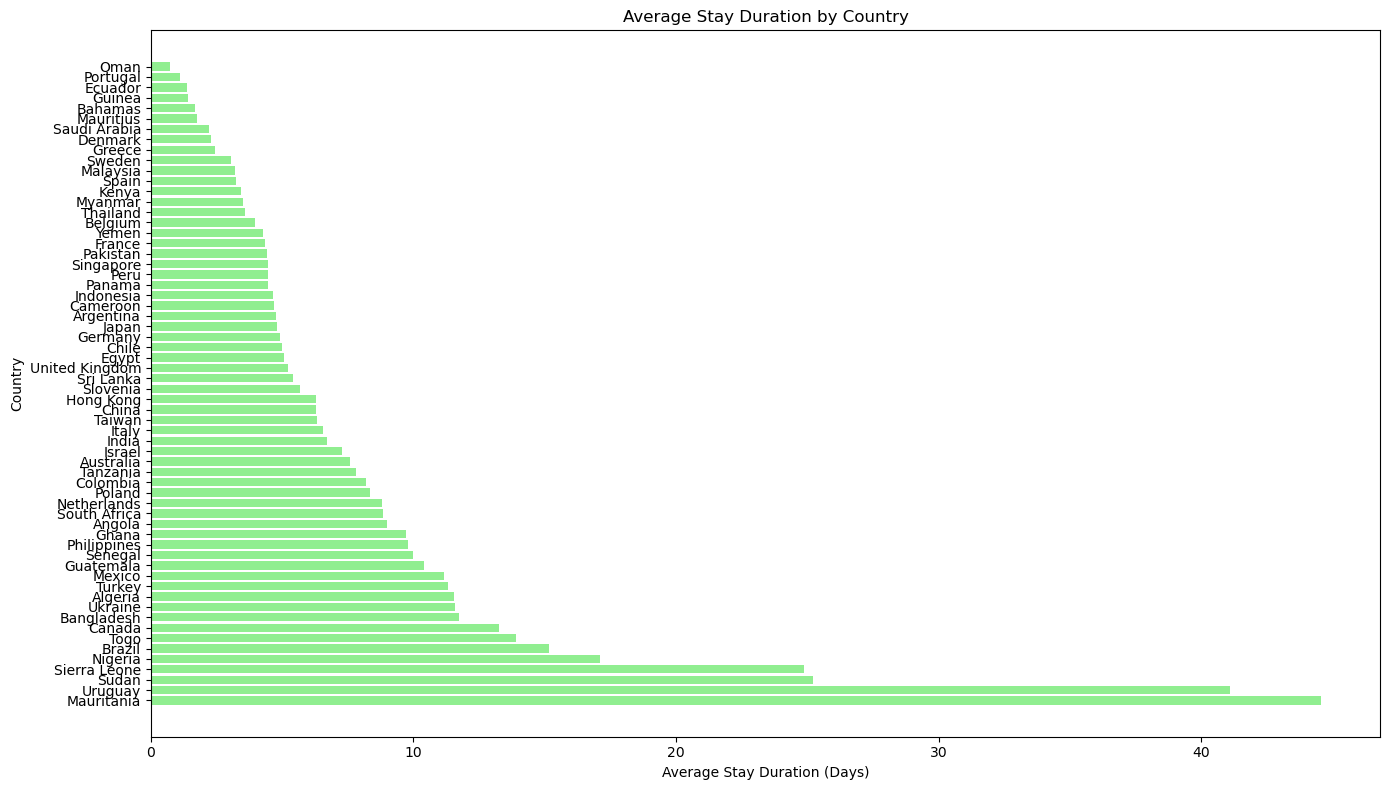

In [26]:
# Country-wise Impact Analysis
country_impact = df.groupby('Country')['Avg Affected Stay Duration by Event'].mean().reset_index()
plt.figure(figsize=(14, 8))
country_impact = country_impact.sort_values('Avg Affected Stay Duration by Event', ascending=False)
plt.barh(country_impact['Country'], country_impact['Avg Affected Stay Duration by Event'], color='lightgreen')
plt.title('Average Stay Duration by Country')
plt.xlabel('Average Stay Duration (Days)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# Data Preparation for Clustering
# Selecting relevant features for clustering: "Severity" and "Avg Affected Stay Duration by Event"
# Converting severity levels to numerical values for clustering purposes
severity_mapping = {'Minor': 1, 'Moderate': 2, 'Severe': 3}
df['SeverityNumeric'] = df['Severity'].map(severity_mapping)
clustering_data = df[['SeverityNumeric', 'Avg Affected Stay Duration by Event']].dropna()

# Standardizing the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Applying KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(clustering_data_scaled)

# Converting the clustering data to a DataFrame for clear display
clustering_results_df = pd.DataFrame({
    "Severity": clustering_data['SeverityNumeric'].map({1: 'Minor', 2: 'Moderate', 3: 'Severe'}),
    "Avg Affected Stay Duration by Event": clustering_data['Avg Affected Stay Duration by Event'],
    "Cluster": clustering_data['Cluster']
})

# Displaying the first few rows of the clustering results
clustering_results_df.head()

# Regression Analysis
# Using Severity as the independent variable and Avg Affected Stay Duration as the dependent variable
X = clustering_data[['SeverityNumeric']].values  # Independent variable
y = clustering_data['Avg Affected Stay Duration by Event'].values  # Dependent variable

# Fitting the Linear Regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Displaying regression coefficients
regression_coefficients = {
    "Intercept": regression_model.intercept_,
    "Slope": regression_model.coef_[0],
    "R^2 Score": regression_model.score(X, y)
}

regression_coefficients


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

{'Intercept': 4.975083935794026,
 'Slope': 0.9019677102701275,
 'R^2 Score': 0.00592163791575262}

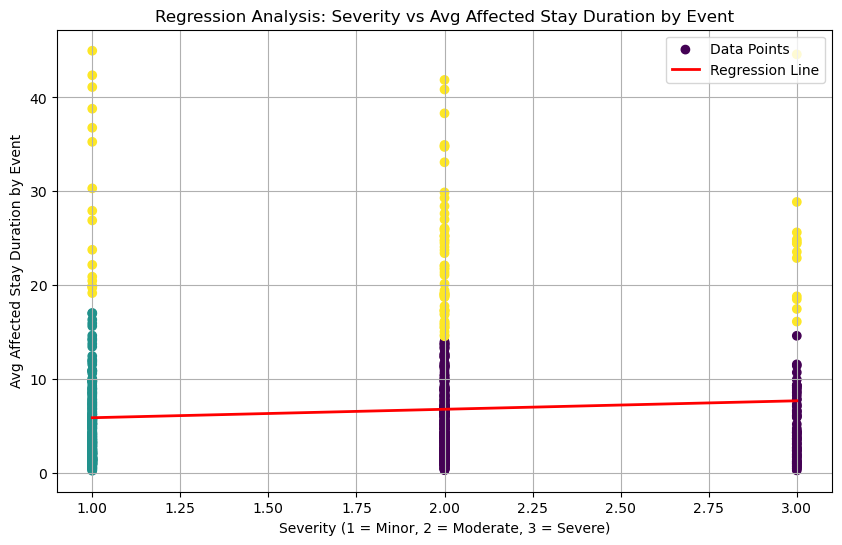

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `clustering_data` and `regression_model` are already defined
# Predicting values using the regression model
X_range = np.array([[1], [2], [3]])  # Range of SeverityNumeric values
y_pred = regression_model.predict(X_range)

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(clustering_data['SeverityNumeric'], 
            clustering_data['Avg Affected Stay Duration by Event'], 
            c=clustering_data['Cluster'], cmap='viridis', label='Data Points')

# Plotting the regression line
plt.plot(X_range, y_pred, color='red', linewidth=2, label='Regression Line')

plt.title('Regression Analysis: Severity vs Avg Affected Stay Duration by Event')
plt.xlabel('Severity (1 = Minor, 2 = Moderate, 3 = Severe)')
plt.ylabel('Avg Affected Stay Duration by Event')
plt.legend()
plt.grid(True)
plt.show()